<a href="https://colab.research.google.com/github/saran459/Weather_Prediction-5/blob/main/codec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test MSE: 4.6196


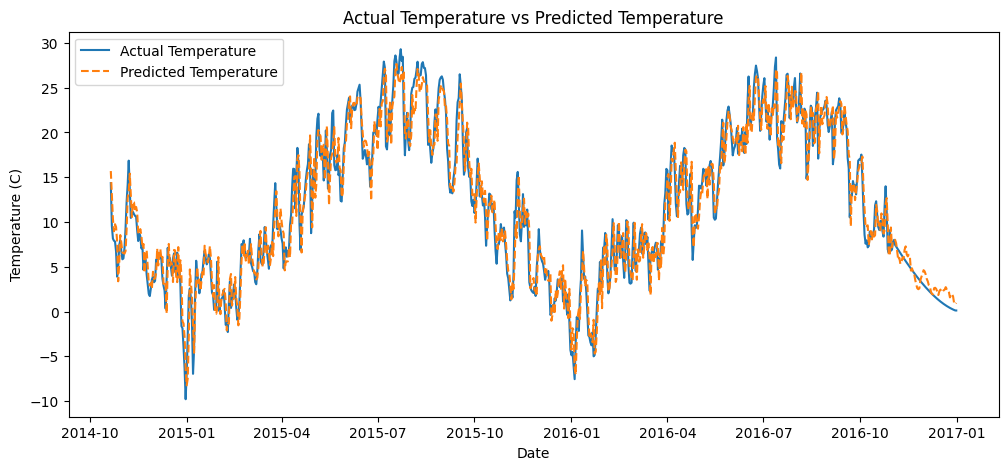

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and preprocess the data
df = pd.read_csv("/content/weather dataset.csv")
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, format='mixed', errors='coerce')
df.set_index('Formatted Date', inplace=True)

# Resample to daily average temperature
daily_temp = df['Temperature (C)'].resample('D').mean()

# Create lag features
def create_lag_features(series, lags=7):
    df = pd.DataFrame(series)
    for i in range(1, lags + 1):
        df[f'lag_{i}'] = df['Temperature (C)'].shift(i)
    df.dropna(inplace=True)
    return df

data = create_lag_features(daily_temp, lags=7)

# Split features and target
X = data.drop('Temperature (C)', axis=1)
y = data['Temperature (C)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual Temperature")
plt.plot(y_test.index, y_pred, label="Predicted Temperature", linestyle='--')
plt.title("Actual Temperature vs Predicted Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()
